## ÁLGEBRA LINEAR NUMÉRICA - Projeto 4

### ALUNOS: Alex Júnio Maia de Oliveira e João Pedro Jerônimo de Oliveira

### CURSO: Ciência de Dados e Inteligência Artificial

### ENTREGA: 21/06/2025

---

#### **Observação**: Caso não apareça o arquivo inteiro, apenas rode o Notebook novamente até aparecer o documento completo. Tal erro ocorreu com frequência no desenvolvimento do projeto.

In [1]:
# Bibliotecas usadas
import numpy as np
import seaborn as sns
import random
import time
from scipy.stats import gaussian_kde, gumbel_r, invweibull, weibull_max # Distribuições para máximos
import matplotlib.pyplot as plt
import multiprocessing as mp
import threading as mt

---

## Questão 1. **Matrizes Gaussianas** Uma matriz gaussiana tem todas as entradas $A_{ij}$ independentes e distribuídas segundo uma normal padrão, ou seja, $A_{ij} ∼ N(0,1)$.

#### a) **Distribuição das normas** Faça um histograma da norma-2 das colunas de uma matriz gaussiana $A$, $m × n$. Use vários valores de $m$, e comente o que você observa.

**Resposta:**

Para ajudar na resolução da questão (e de exercícios posteriores), fizemos a função `gaussian_matrix`, que cria uma matriz $A$ com cada entrada $A_{ij} ∼ N(0, 1)$ e independentes.

Além disso, dividimos o problema em duas interpretações:
- observar a distribuição gerada pelas normas das colunas de cada matriz individualmente
- observar a distribuição gerada pelas normas das colunas de cada matriz conjuntamente

Com relação a primeira interpretação, fizemos o gráfico **"Distribuição das normas 2 das colunas de matrizes gaussianas (separdas)"** para observar tal comportamento com diferentes matrizes (fixando o número de colunas e variando o número de linhas). Realizando os devidos testes, decobrimos que as distribuições se aproximam da distribuição $\chi$ (raiz quadrada da distribuição $\chi^2$) com $m$ graus de liberdade.

Para verificar tal fato, basta observar que cada $A_{ij} ∼ N(0, 1)$. Portanto, a norma da i-ésima $A_i = \begin{bmatrix} A_{i1} & A_{i2} & A_{i3} & \dots & A_{im} \end{bmatrix}$ coluna seria $||A_i||_2 = √(\sum_{j=1}^mA_{ij}^2)$. Pela definição da distribuição $\chi_m^2$, temos que, $X_1, X_2,...,X_m$ iid $∼ N(0, 1)$ e $X = X_1^2+X_2^2+...+X_m^2$, então $X∼\chi_m^2$ (distribuição chi quadrado com $m$ graus de liberdade). Além disso, temos que se $Y = \sqrt{X}$, então $Y∼\chi_m$ (distribuição chi com $m$ graus de liberdade).

Já em relação a segunda parte, fizemos testes com $m \in [2, 1000]$ e $n = 500$, criamos matrizes $A_{m×n}$ e calculamos as normas 2 de todas as suas colunas e plotamos a distribuição dos valores, relacionando a densidade de ocorrência de cada intervalo. Assim, com base no gráfico **Distribuição das normas 2 das colunas de matrizes gaussianas (conjuntas)**, concluímos que a distribuição dos valores se aproxima de uma distribuição triangular (https://en.wikipedia.org/wiki/Triangular_distribution). Não iremos provar essa parte pois não vimos essa distribuição.

A distribuição triangular tem *função de densidade de probabilidade (f.d.p):*
$$
f(x) = 
\begin{cases} 
0 & \text{para } x < a \\
\frac{2(x - a)}{(b - a)(c - a)} & \text{para } a \leq x \leq c \\
\frac{2(b - x)}{(b - a)(b - c)} & \text{para } c < x \leq b \\
0 & \text{para } x \geq b
\end{cases}
$$

no nosso caso: $a \approx 0 , b \approx 34 , c \approx 30$

In [2]:
def gaussian_matrix(m:int, n:int):
    return np.random.normal(0, 1, (m,n))

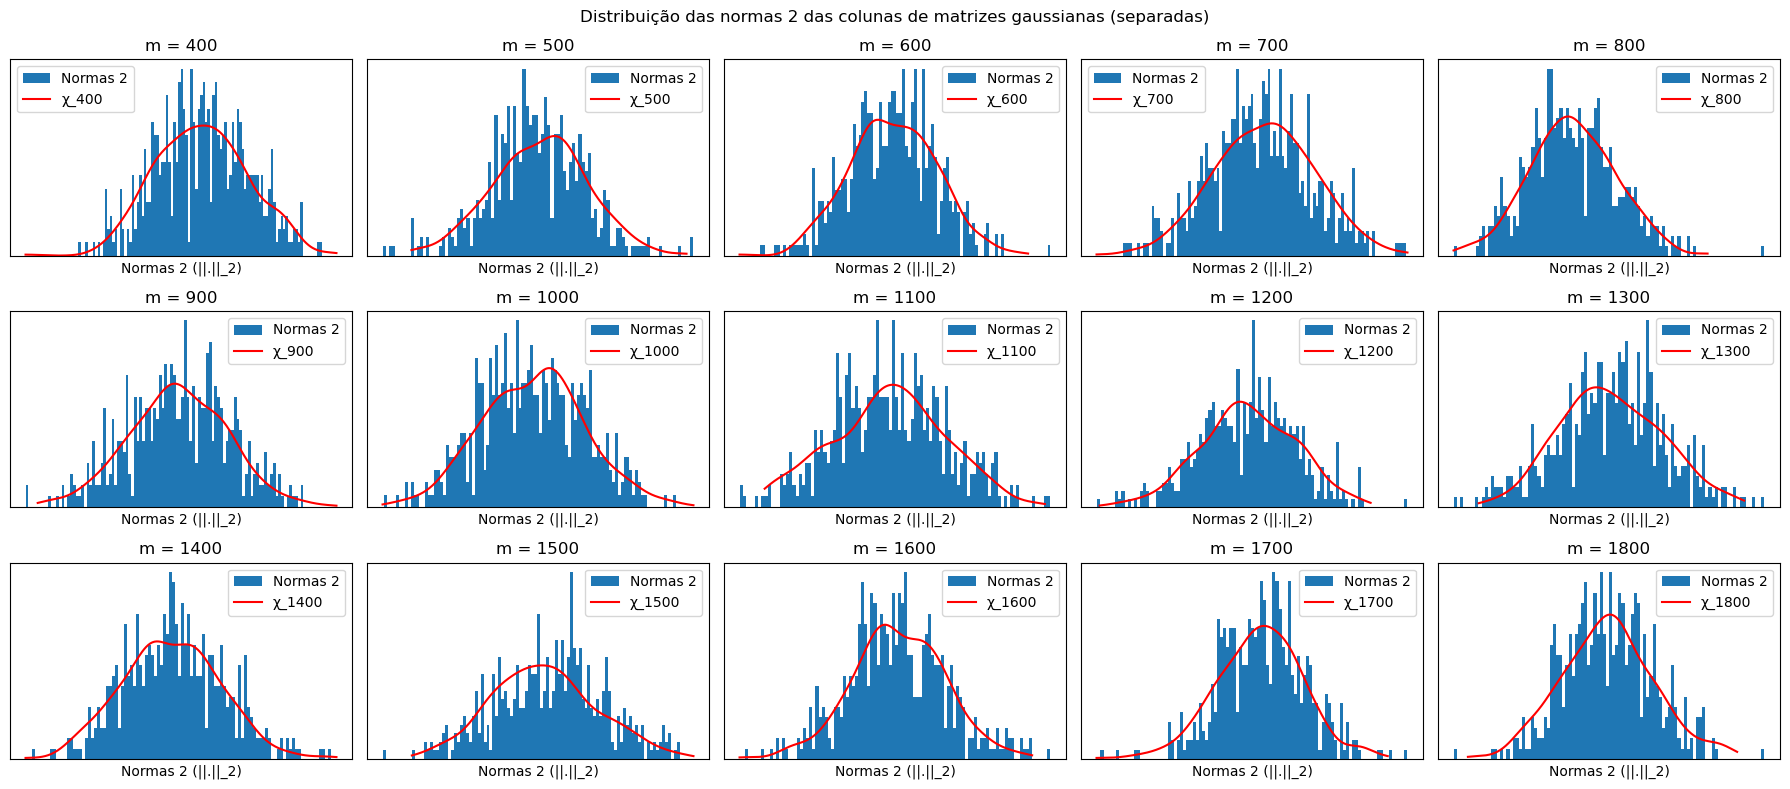

In [3]:
n = 500
grid = [
    [ 400, 500, 600, 700, 800 ],
    [ 900, 1000, 1100, 1200, 1300 ],
    [ 1400, 1500, 1600, 1700, 1800 ]
]

fig, axes = plt.subplots(3, 5, figsize=(18, 8))

fig.suptitle("Distribuição das normas 2 das colunas de matrizes gaussianas (separadas)")

for i in range(len(grid)):
    for j, m in enumerate(grid[i]):
        A = gaussian_matrix(m,n)
        G = np.dot(A.T, A)  # Calculando o produto interno (G_ij = ⟨A_i, A_j⟩)
        diag_val = np.diag(G)  # Os valores da diagonal é o quadrado da norma (G_ii = ⟨A_i, A_i⟩)
        norm = np.sqrt(diag_val)  # Calculando as normas (||A_i||_2 = √⟨A_i, A_i⟩)

        axes[i][j].set_title(f"m = {m}")

        axes[i][j].hist(
            norm,
            bins=100,
            label="Normas 2",
            density=True
        )
        
        # Comparação com a distribuição χ=sqrt(χ^2) com m graus de liberdade
        compare = np.sqrt(np.random.chisquare(df=m, size=n)) # df = graus de liberdade size = tamanho
        kde = gaussian_kde(compare)
        x_vals = np.linspace(min(compare), max(compare), 300)
        axes[i][j].plot(x_vals, kde(x_vals), color="red", label=f"χ_{m}")

        axes[i][j].set_xlabel("Normas 2 (||.||_2)")
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
        axes[i][j].legend()
        
plt.tight_layout()
plt.show()

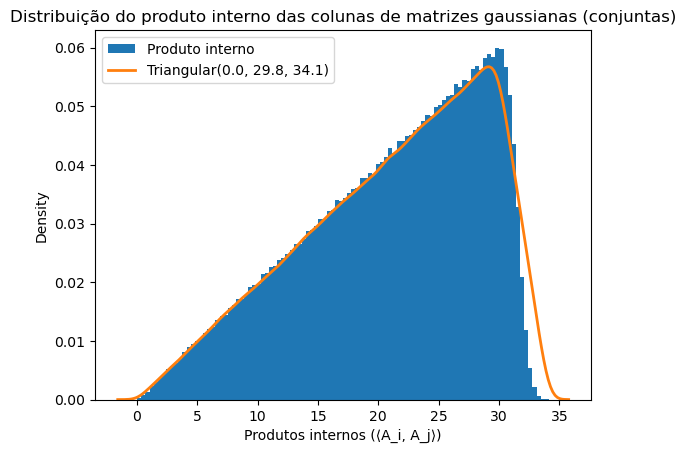

In [4]:
norms = []
for m in range(2, 1001):
    A = gaussian_matrix(m,n)
    G = np.dot(A.T, A)  # Calculando o produto interno (G_ij = ⟨A_i, A_j⟩)
    diag_val = np.diag(G)  # Os valores da diagonal é o quadrado da norma (G_ii = ⟨A_i, A_i⟩)
    norm = np.sqrt(diag_val)  # Calculando as normas (||A_i||_2 = √⟨A_i, A_i⟩)
    norms.extend(norm)

# Comparando com a distribuição triangular
left = np.min(norms)
mode = 29.8
right = np.max(norms)
compare = np.random.triangular(left=left, mode=mode, right=right, size=len(norms)) # left = a, right = b, mode = c

plt.hist(norms, bins=100, label="Produto interno", density=True)
sns.kdeplot(compare, linewidth=2, label=f"Triangular({left:.1f}, {mode:.1f}, {right:.1f})")
plt.title("Distribuição do produto interno das colunas de matrizes gaussianas (conjuntas)")
plt.xlabel("Produtos internos (⟨A_i, A_j⟩)")
plt.legend()
plt.show()

---

#### b) **Produtos internos** Agora, fixe $m = 100$ e faça o histograma do produto interno $⟨A_i, A_j⟩$ entre colunas de uma matriz gaussiana $A$. Exclua os casos $i = j$, e use $n = 100,200, 500$ e $1000$. O que acontece? Qual parece ser a distribuição para $n → ∞$?

**Resposta:**

Para ajudar na compreensão do exercício e numa inspiração para explicar o que ocorre quando $m → ∞$, fizemos o gráfico **Distribuição do produto interno das colunas de matrizes gaussianas**, em que mostramos a comparação da distribuição dos produtos internos entre as colunas de uma matriz gaussiana e a distribuição normal de média $0$ e variância $m$.

Pelo gráfico, percebemos que, quanto maior o valor de $m$, mais a distribuição dos produtos internos se aproxima da distribuição normal $N(0, m)$.

*Demonstração:*

- **Fato 1:** Sejam $X_1, X_2, X_3, X_4$ variáveis aleatórias independentes entre si e $Z_1 = X_1X_2, Z_2 = X_3X_4$. Portanto, temos que $Cov(Z_1, Z_2) = E(Z_1Z_2) - E(Z_1)E(Z_2) = E(X_1X_2X_3X_4) - E(X_1X_2)E(X_3X_4) = E(X_1)E(X_2)E(X_3)E(X_4) - E(X_1)E(X_2)E(X_3)E(X_4) = 0$ e, segue que, $Z_1, Z_2$ também são independente. Assim, podemos estender esse resultado para $Z_i = X_iY_i$ com $X_i, Y_i$ indenpendentes.
- **Fato 2:** O *Teorema Central do Limite* nos diz que, dadas variáveis aleatórias $X_1, X_2, ..., X_n$ independentes, a soma $S_n = X_1 + X_2 + ... + X_n$ se aproxima da distribuição normal $N(0, n)$ (valor eperado $0$ e variância $n$). A demonstração do teorema está no link: https://www.youtube.com/watch?v=aJcyQjskvqo.

Sejam as colunas $A_i = \begin{bmatrix} x_1 & x_2 & x_3 & \dots & x_m \end{bmatrix}$ e $A_j = \begin{bmatrix} y_1 & y_2 & y_3 & \dots & y_m \end{bmatrix}$. Assim, temos  $⟨A_i, A_j⟩ = \sum_1^mx_iy_i$. Fazendo $z_i = x_iy_i$, temos que $⟨A_i, A_j⟩ = \sum_1^mz_i$. Como as entradas de ambas as colunas são variáveis aleatórias independentes entre si (se estende por toda a matriz), temos que, pelo fato 1, as variáveis $z_1, z_2, ..., z_m$ são independentes entre si e, pelo fato 2, $S_m = ⟨A_i, A_j⟩ = \sum_1^mz_i$ se aproxima da distribuição normal $N(0, m)$ (isso se estende por toda a matriz).


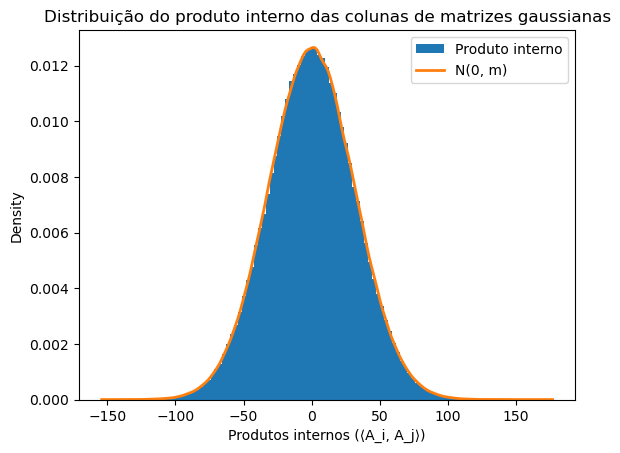

In [5]:
m = 1000
ns = [100, 200, 500, 1000]
prods = []
for n in ns:
    A = gaussian_matrix(m, n)
    G = np.dot(A.T, A)  # Calculando o produto interno (G_ij = ⟨A_i, A_j⟩)
    indices = np.triu_indices(n, k=1) # Valores de ⟨A_i, A_j⟩ para i != j      
    prod = G[indices]  # Valor absoluto dos produtos internos                  
    prods.extend(prod)                            

# Plot específico para ver o comportamento da distribuição e compará-la
compare = np.random.normal(loc=0, scale=np.sqrt(m), size=1400000)  # Criando uma amostra grande da normal para comparação
                                                                    # loc = esperança e scale = desvio padrão

plt.hist(prods, bins=100, label="Produto interno", density=True)
sns.kdeplot(compare, linewidth=2, label="N(0, m)")
plt.title("Distribuição do produto interno das colunas de matrizes gaussianas")
plt.xlabel("Produtos internos (⟨A_i, A_j⟩)")
plt.legend()
plt.show()

---

#### c) **A distribuição do máximo** Queremos ver quão “não ortogonal” é a matriz $A$. Para isto, vamos estudar o máximo de $\frac{⟨A_i, A_j⟩}{||A_i||||A_j||}$ entre colunas distintas de uma matriz gaussiana $A$. Para isto, gere $K = 1000$ matrizes gaussianas $A_k$ de ordem $100 × 300$, calcule o máximo indicado acima, e faça um histograma dos $K$ valores obtidos.

**Resposta:**

In [6]:
def plot_dist(datas:list, legends:list, xlabel, title="", bins=100, density=True, figsize=(15, 5)):
    n = len(datas)
    plt.figure(figsize=figsize)
    for i in range(n):
        plt.hist(datas[i], bins=bins, label=legends[i], density=density)
    if density:
        plt.ylabel("Densidade")
    else:
        plt.ylabel("Contagem")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()

def maxes(k=1000, m=100, n=300):
    max_similarities = []

    for _ in range(k):
        A = gaussian_matrix(m,n)
        A_normalized = A / np.linalg.norm(A, axis=0)
        G = np.dot(A_normalized.T, A_normalized) 
        np.fill_diagonal(G, 0)
        max_val = np.max(np.abs(G))
        max_similarities.append(max_val)

    return max_similarities

def maxes_for_multiprocessing(args):
    k, m, n = args
    max_similarities = []
    for _ in range(k):
        A = gaussian_matrix(m,n)
        A_normalized = A / np.linalg.norm(A, axis=0)
        G = np.dot(A_normalized.T, A_normalized) 
        np.fill_diagonal(G, 0)
        max_val = np.max(np.abs(G))
        max_similarities.append(max_val)
    
    return m, n, max_similarities

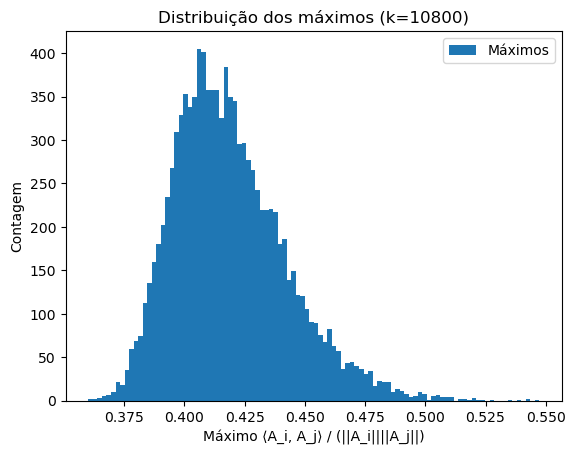

In [ ]:
k = 1000
maxes_vals = maxes(k)
plot_dist([maxes_vals], ["Máximos"], xlabel="Máximo ⟨A_i, A_j⟩ / (||A_i||||A_j||)", title=f"Distribuição dos máximos (k={k})", density=False, figsize=(6.4, 4.8))

##### Distribuição de Gumbel

![Exemplo de imagem](https://excelatfinance.com/xlf20/media/xlf-gumbel-density.png)

---

#### d) **Complexidade computacional** Qual a complexidade de calcular o máximo acima? Qual valor de $K$ você acha que seria bom para ter uma boa estimativa do máximo esperado?

**Resposta:**

Segue aqui o algoritmo para fazermos a análise.
```py
for _ in range(k):
    A = gaussian_matrix(m, n)
    values = []
    for i in range(n):
        for j in range(n):
            if i != j:
                A_i = A[:, i]
                A_j = A[:, j]
                value = np.inner(A_i, A_j) / (norm2(A_i) * norm2(A_j))
                values.append(value)
    max = values[np.argmax(values)]
```

De antemão, podemos notar que nenhum dos `for` vão parar de executar antes que **todas** as iterações aconteçam. Ou seja, de antemão, vemos que os 3 `for` iniciais nos geram uma complexidade de:
$$
    O(k n^2)
$$
Entretando, dentro desses loops, ainda temos as operações de **produto interno** e **norma** que são $O(m)$, tendo em vista que as colunas tem $m$ elementos. Assim, temos que nosso resultado final de complexidade é:
$$
    O(k n^2 m)
$$

Descobrimos também que, teoricamente, podemos diminuir a complexidade do algoritmo de $O(kn^2m)$ para $O(knm^2)$ $(m \le n)$. Primeiramente, fazemos a decomposição SVD reduzida da matriz $A = U\Sigma V^*$, pois pagamos na ordem de $nm^2$ iterações. Após isso, calculamos $A^*A = V\Sigma^* \Sigma V^* = V\Sigma^2V$. Como $\Sigma$ é uma matriz diagonal, pagamos na ordem de $m$ iterações para fazer $x = \Sigma^2V$ e mais $m$ para fazer $Vx$. Por fim, pagamos mais uma ordem $O(1)$ iterações para achar os valores máximos (precisamos percorrer apenas acima ou abaixo da diagonal principal). Repetindo tal processo $K$ vezes, obtemos uma complexidade $O(kn^2m)$. 

In [11]:
means = []
vars = []
stds = []
for k in range(800, 30001, 500):
    maxes_vals = maxes(k)
    mean_max = np.mean(maxes_vals)
    var_max = np.var(maxes_vals)
    std_max = np.std(maxes_vals)
    vars.append(var_max)
    stds.append(std_max)
    means.append(mean_max)

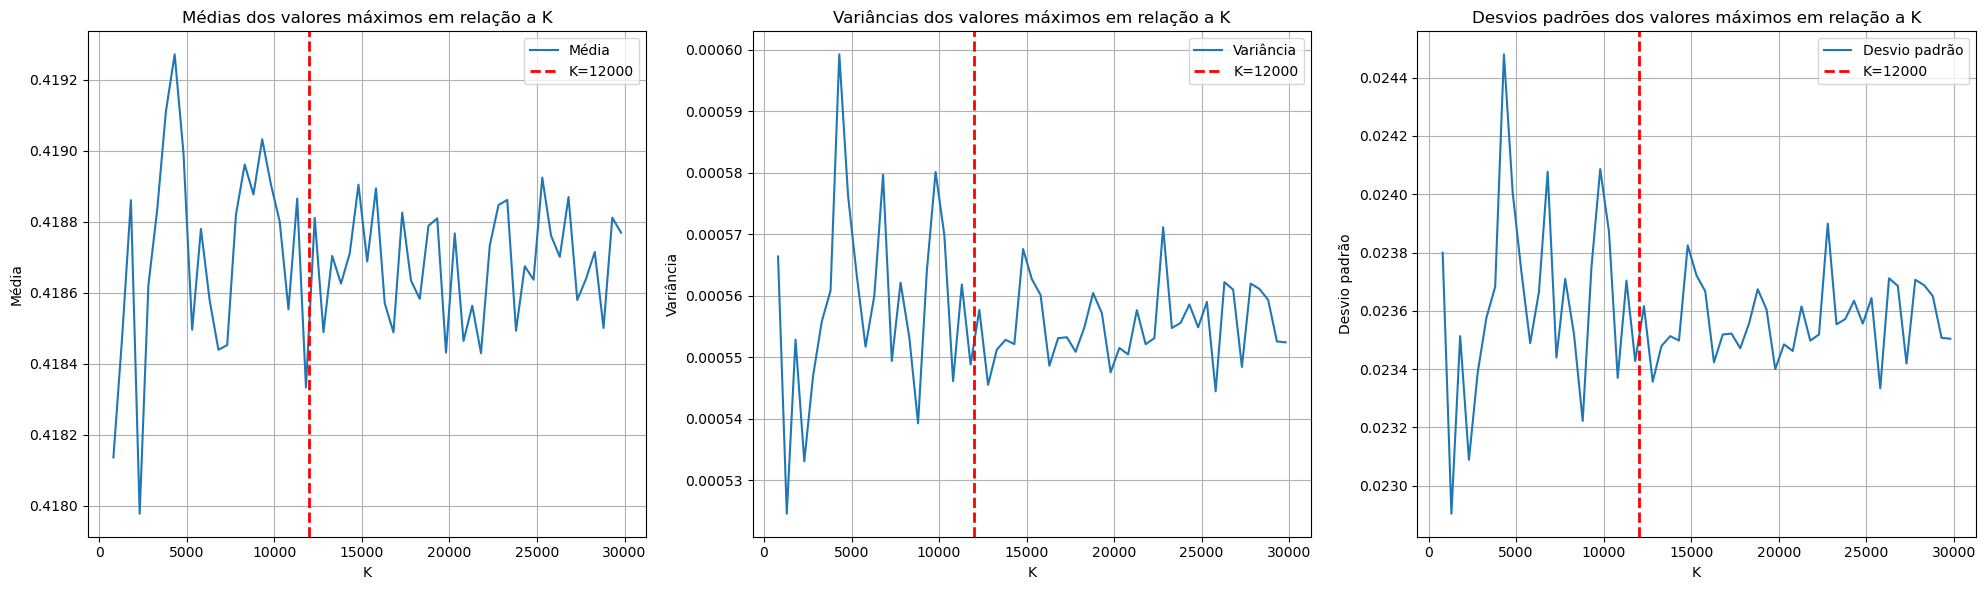

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].plot([i for i in range(800, 30001, 500)], means, label="Média")
ax[0].axvline(x=12000, color='r', linestyle='--', linewidth=2, label="K=12000")  # Linha vertical em x=1
ax[0].set_title("Médias dos valores máximos em relação a K")
ax[0].set_xlabel("K")
ax[0].set_ylabel("Média")
ax[0].grid(True)
ax[0].legend()

ax[1].plot([i for i in range(800, 30001, 500)], vars, label="Variância")
ax[1].axvline(x=12000, color='r', linestyle='--', linewidth=2, label="K=12000")  # Linha vertical em x=1
ax[1].set_title("Variâncias dos valores máximos em relação a K")
ax[1].set_xlabel("K")
ax[1].set_ylabel("Variância")
ax[1].grid(True)
ax[1].legend()

ax[2].plot([i for i in range(800, 30001, 500)], stds, label="Desvio padrão")
ax[2].axvline(x=12000, color='r', linestyle='--', linewidth=2, label="K=12000")  # Linha vertical em x=1
ax[2].set_title("Desvios padrões dos valores máximos em relação a K")
ax[2].set_xlabel("K")
ax[2].set_ylabel("Desvio padrão")
ax[2].grid(True)
ax[2].legend()

plt.tight_layout()
plt.show()

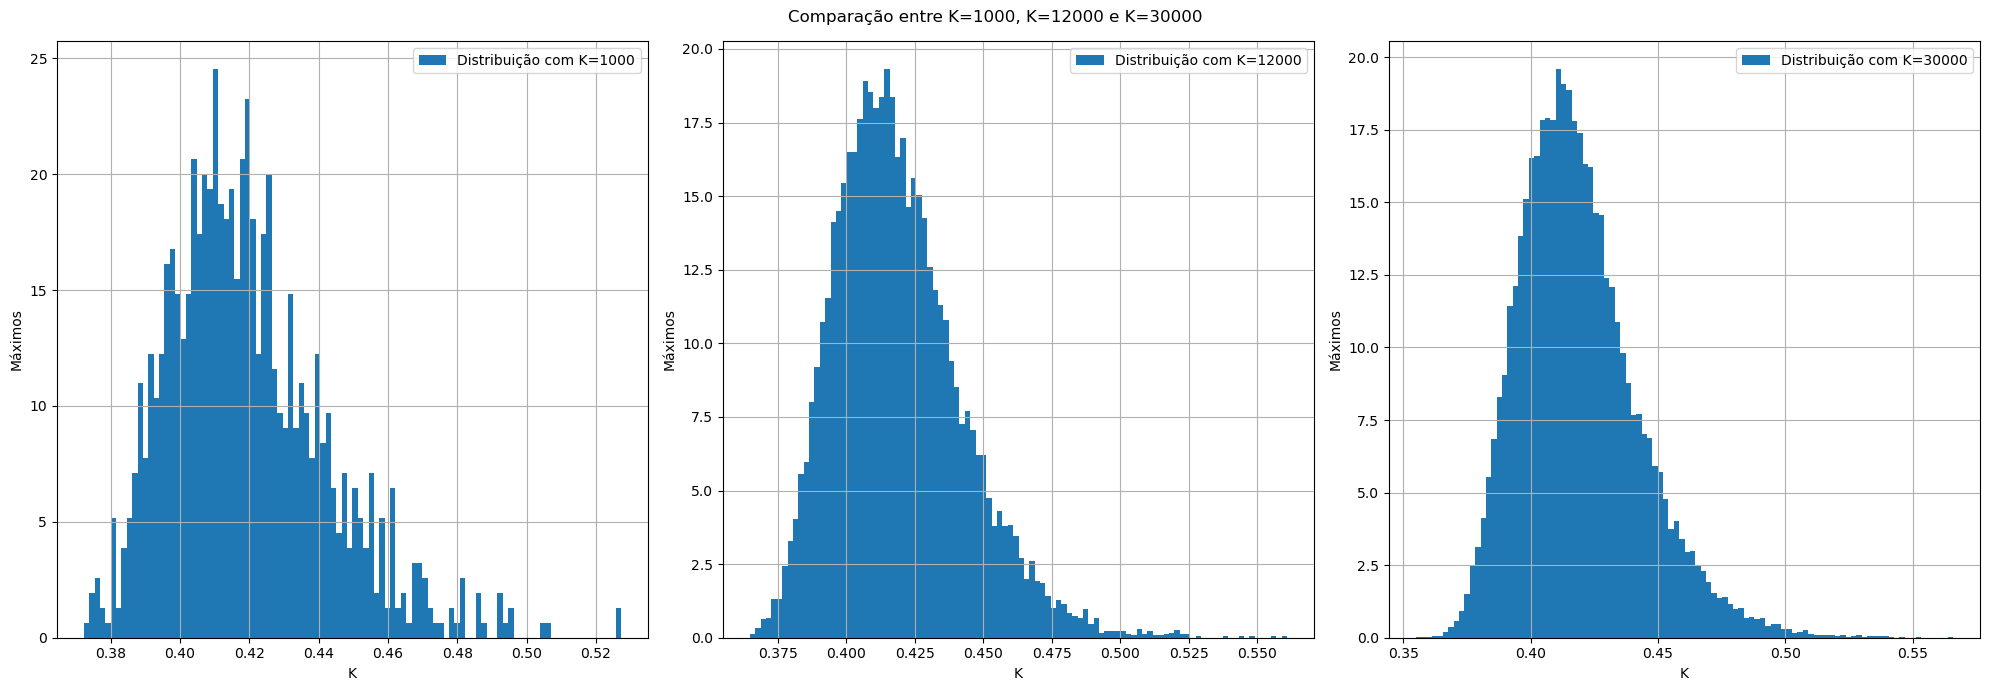

In [36]:
k1 = 1000
k2 = 12000
k3 = 30000
maxes_vals_1000 = maxes(k1)
maxes_vals_12000 = maxes(k2)
maxes_vals_30000 = maxes(k3)

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

ax[0].hist(maxes_vals_1000, label="Distribuição com K=1000", density=True, bins=100)
ax[0].set_xlabel("K")
ax[0].set_ylabel("Máximos")
ax[0].grid(True)
ax[0].legend()

ax[1].hist(maxes_vals_12000, label="Distribuição com K=12000", density=True, bins=100)
ax[1].set_xlabel("K")
ax[1].set_ylabel("Máximos")
ax[1].grid(True)
ax[1].legend()

ax[2].hist(maxes_vals_30000, label="Distribuição com K=30000", density=True, bins=100)
ax[2].set_xlabel("K")
ax[2].set_ylabel("Máximos")
ax[2].grid(True)
ax[2].legend()

plt.suptitle("Comparação entre K=1000, K=12000 e K=30000")
plt.tight_layout()
plt.show()

---

#### e) **A distribuição do máximo, parte 2** Escolha valores de $K$ correspondentes e faça histogramas e comente os resultados para os seguintes pares de $(m, n): (100, 100), (100, 300), (200, 200), (200, 600), (500, 500), (500, 1500), (1000, 1000), (1000, 3000)$.

**Resposta:**

In [ ]:
K = 10800

values = [
    (K, 100, 100),
    (K, 100, 300),
    (K, 200, 200),
    (K, 200, 600),
    (K, 500, 500),
    (K, 500, 1500),
    (K, 1000, 1000),
    (K, 1000, 3000)
]

with mp.Pool() as pool:
    results = pool.map(maxes_for_multiprocessing, values)

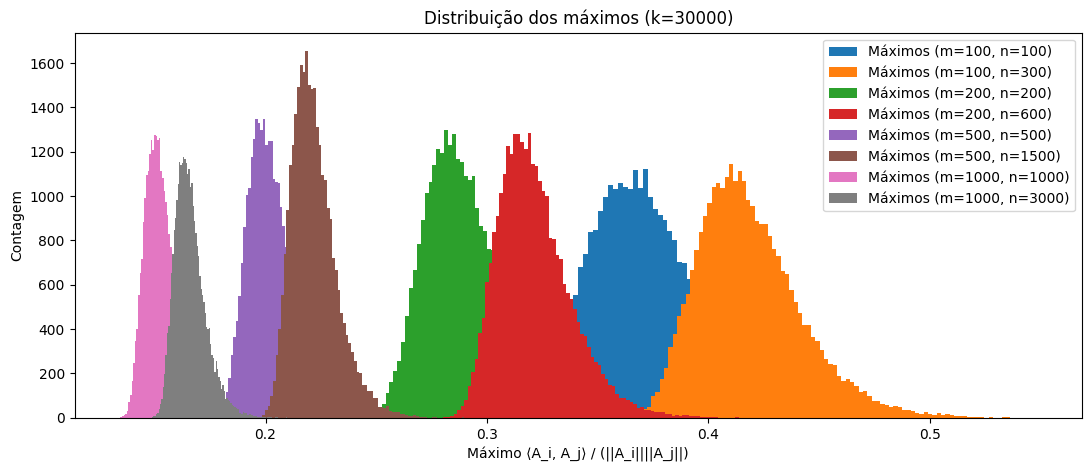

In [44]:
plot_dist(
    [result[2] for result in results],
    [f"Máximos (m={result[0]}, n={result[1]})" for result in results],
    xlabel="Máximo ⟨A_i, A_j⟩ / (||A_i||||A_j||)",
    title="Distribuição dos máximos (k=30000)", density=False,
    figsize=(13, 5)
)

Fim do documento

---